# Задача регрессии

Воспользуемся данными о недвижимости в штате Айова из Ames Housing Dataset. 

Это классическая задача предсказания цены недвижимости, которую мы уже решали не раз с различными датасетами.

Для примера визуализации из всех признаков, описывающих объекты недвижимости, мы выберем:
* Lot_Frontage — ширина фасада;
* Lot_Area — площадь объекта недвижимости.

Необходимо предсказать стоимость недвижимости (Sale_Price).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

from sklearn import set_config
set_config(transform_output='pandas')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8) 

import seaborn as sns
# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

%config InlineBackend.figure_format = 'retina' # для высокого качества 

In [23]:
# создаём обучающую выборку
ames_data = pd.read_csv('data/AmesHousing.zip')

# для более понятной визуализации перед построением дерева уберём из датасета объекты
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]

X, y = ames_data[['Lot Frontage', 'Lot Area']], ames_data['SalePrice']

In [24]:
# инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

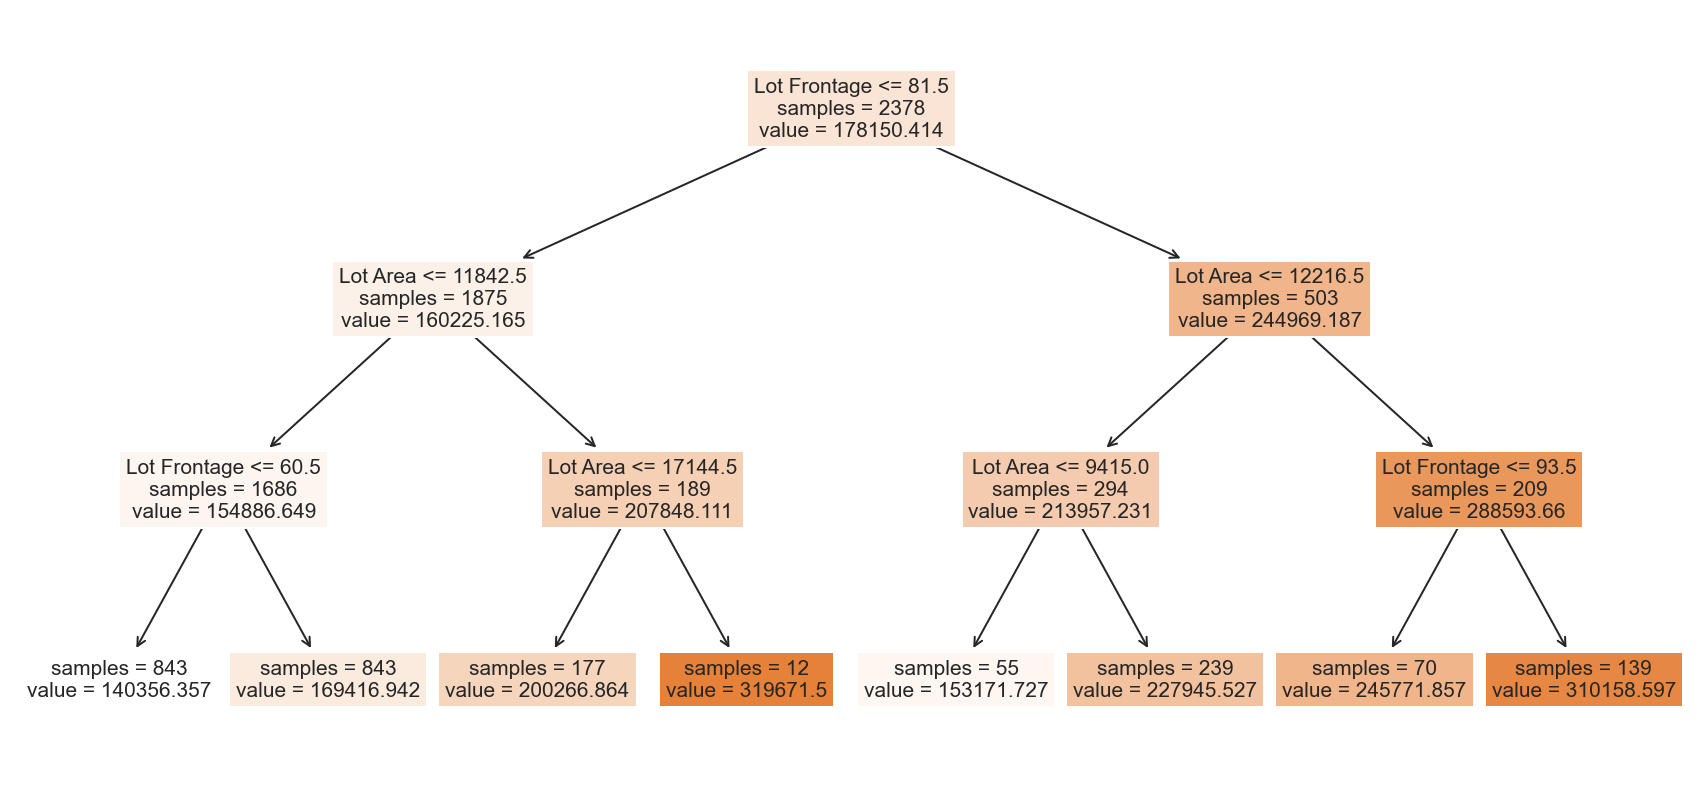

In [25]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, # дерево решений 
    feature_names=X.columns, # имена факторов
    filled=True, # расцветка
    impurity=False, # отображать ли неоднородность
);

In [26]:
X

,Lot Frontage,Lot Area
1,80.0,11622
2,81.0,14267
3,93.0,11160
4,74.0,13830
5,78.0,9978
...,...,...
2923,80.0,17400
2925,37.0,7937
2927,62.0,10441
2928,77.0,10010


Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области

C:\Users\avvoy\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


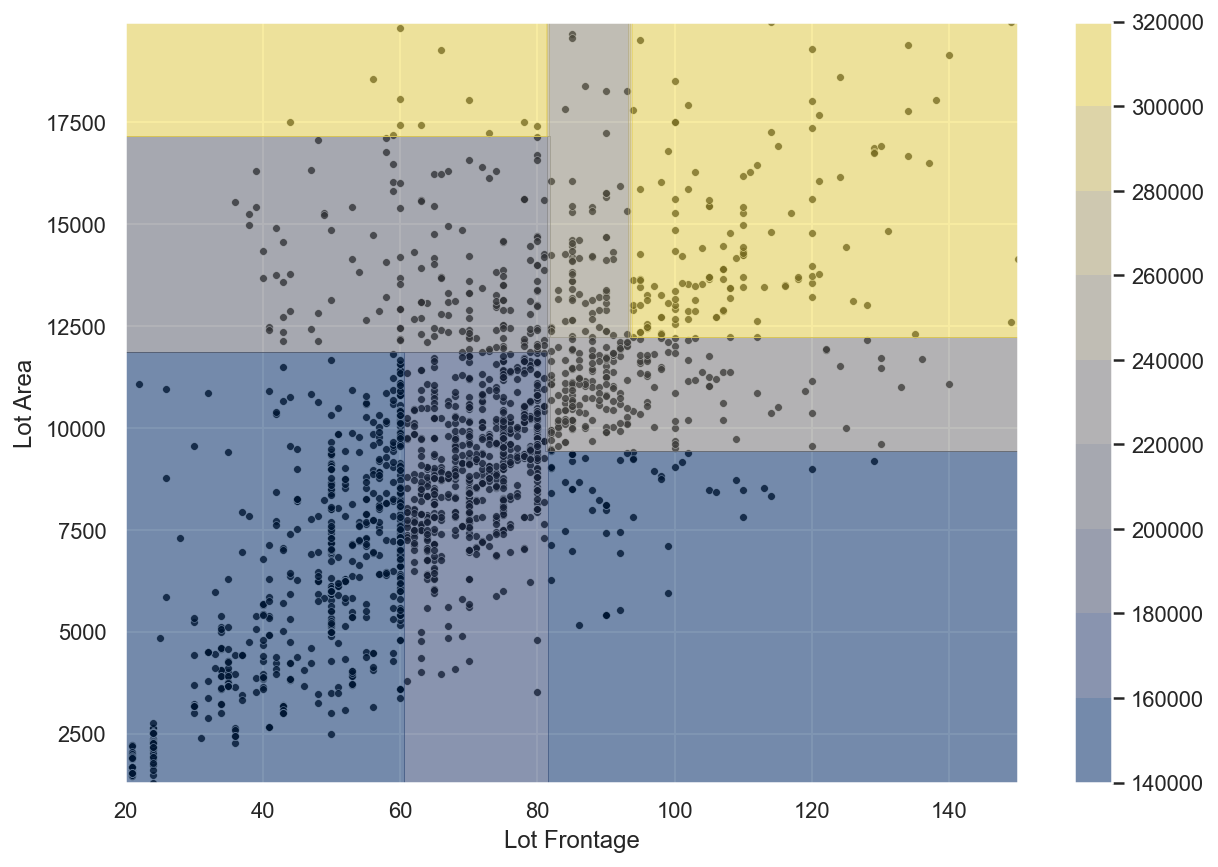

In [28]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(data=X, x='Lot Frontage', y='Lot Area', s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

# Воспользуемся данными о банкнотах из Banknote Authentication Dataset.

В качестве примера для визуализации из всех характеристик, описывающих изображения банкнот, будем использовать:

- Variance (дисперсию);
- Skewness (асимметрию).

Наша цель — предсказать, является ли банкнота фальшивой

(Class):
- 1 — фальшивая, 
- 0 — подлинная.

In [29]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('data/bill_authentication.zip')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

In [30]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

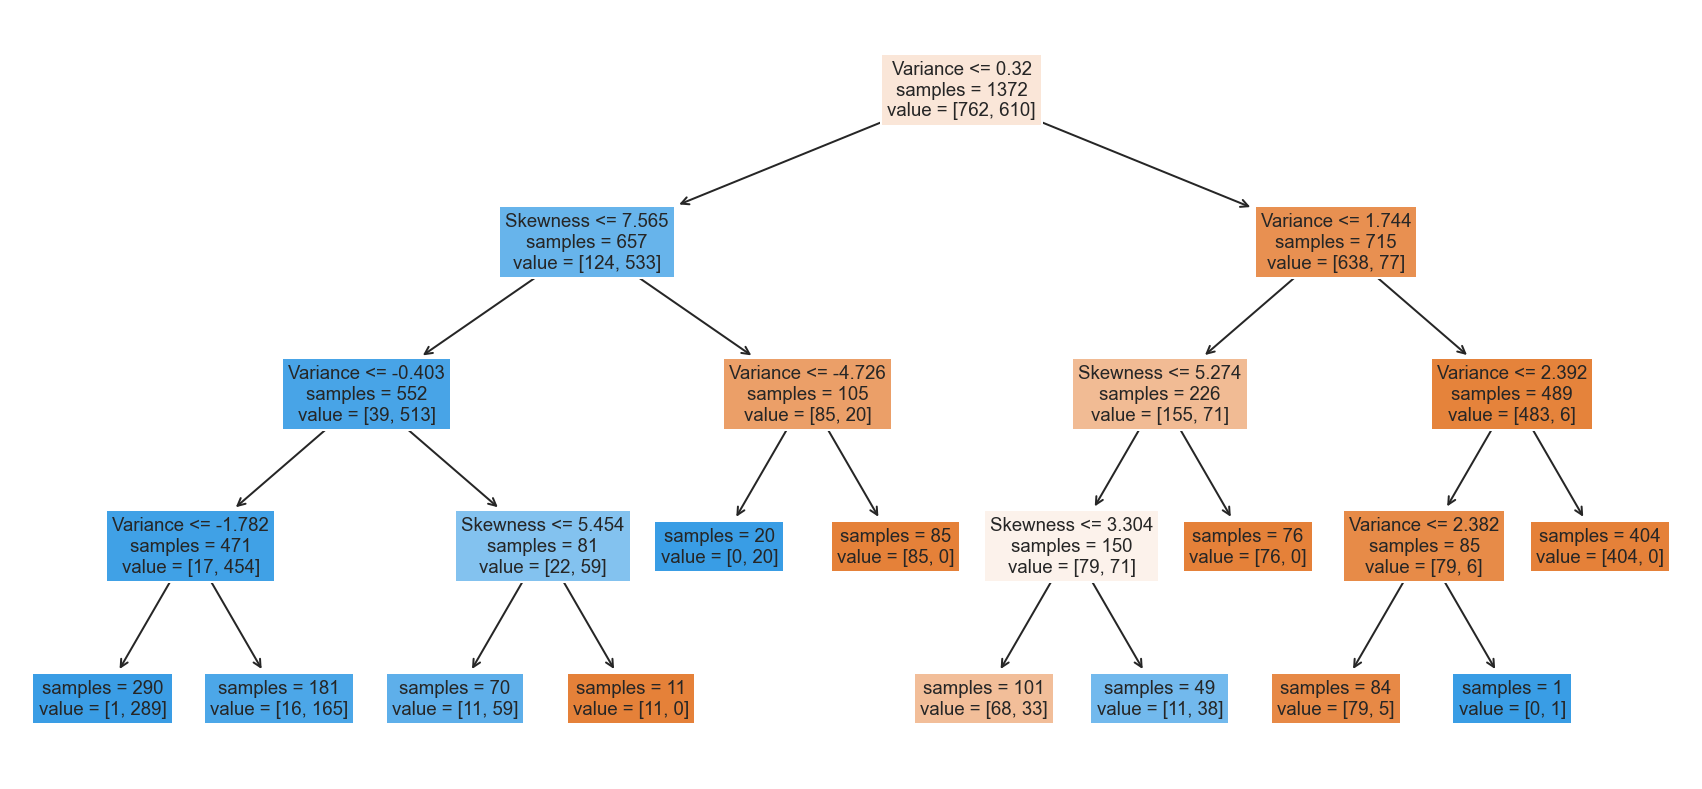

In [31]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Value показывает распределение значений для y, каких больше, тот и класс, это если не определять порог.

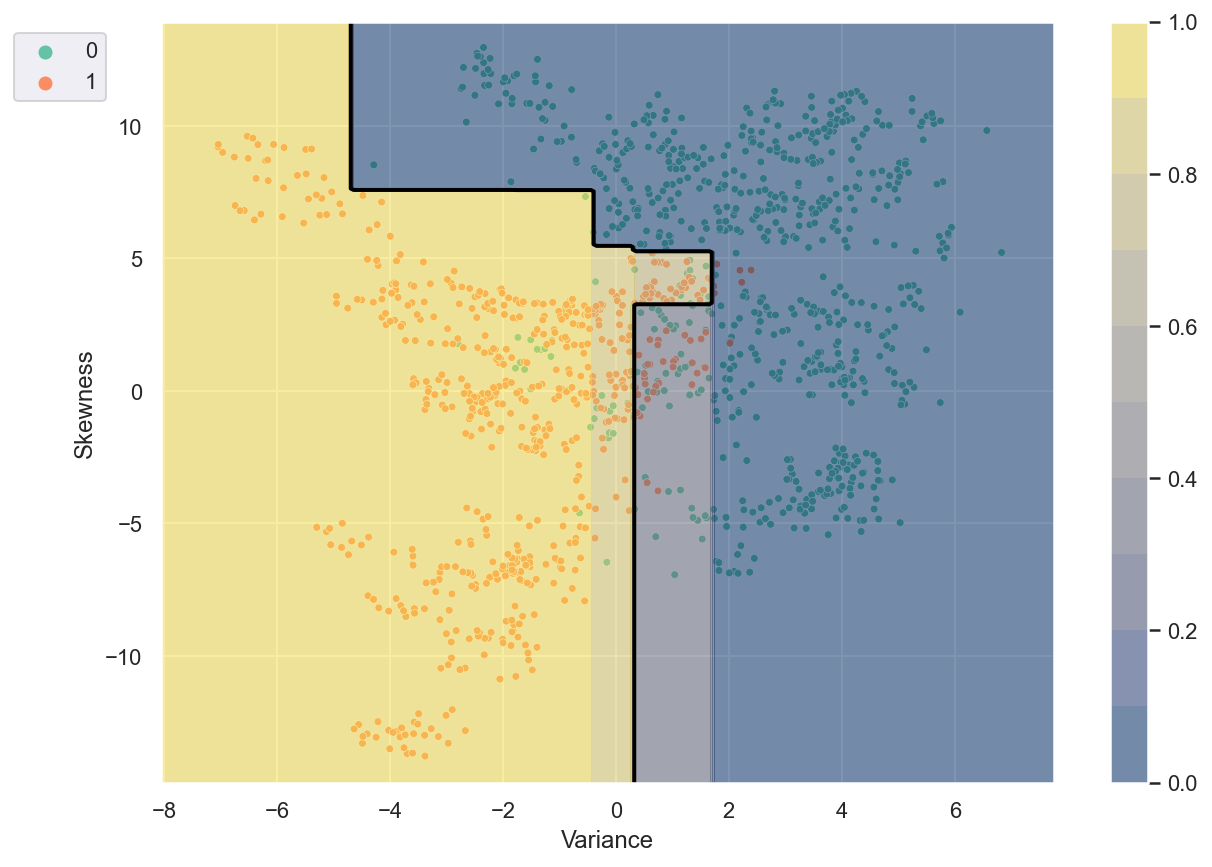

In [32]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)